## Lade Pakete

In [146]:
import os # um Pfad anzulegen oder zu ändern
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#sklearn Pakete
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.feature_selection import VarianceThreshold

# statsmodel Pakete
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Pfadeingabe

In [138]:
# Pfad zum lokalen Speicherort der Daten, r davor einfügen damit spezielle Zeichen auch als String erkannt werden
data_dir = r"C:\Users\MLA6FE\Desktop\Data_Science_Project\data"
file_path = os.path.join(data_dir, "bankaccounts.csv")

## CSV-Daten in data frame laden

In [149]:
df_bankaccounts = pd.read_csv(file_path)

## Überblick über Daten verschaffen

In [ ]:
#df_bankaccounts.head() # erste 5 Zeilen des Datensatzes
#df.shape               # Anzahl der Zeilen und Spalten
#df.columns             # Spaltennamen
df_bankaccounts.info()  # Spaltennamen, 0-Werte, Datentypen

## Nicht benötigte Spalten löschen und unter X (unabhängige Variablen) und y (abhängige Variable) speichern

In [150]:
X = df_bankaccounts.drop(axis = 1, columns = ["x1", "x2", "fraud_bool"]) # löscht die gewünschten Spalten aus data frame
y = df_bankaccounts["fraud_bool"] # erzeugt data frame y mit gewünschter Spalte
X.shape, y.shape # gibt die Form der data frames aus

((1000000, 31), (1000000,))

## Häufigkeit der Werte der Zielgröße über alle Features

fraud_bool
0    98.897
1     1.103
Name: proportion, dtype: float64


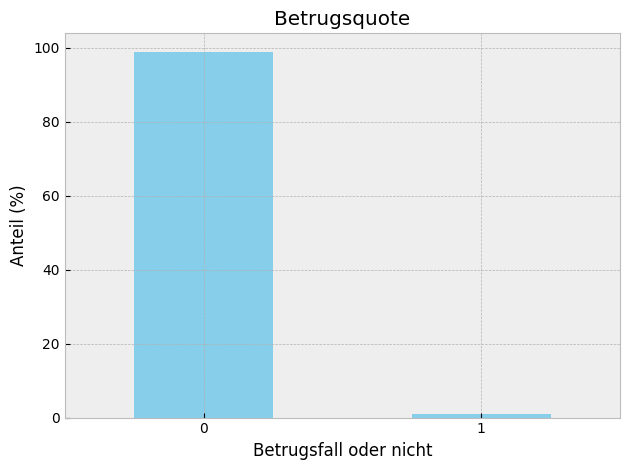

In [125]:
# Definiere style für alle folgenden plots
plt.style.use('bmh')

fraud_or_not = y.value_counts(normalize=True).sort_index() * 100 # zählt alle Häufigkeiten je Kategortie und sortiert es nach aufsteigendem index
# normalisiert die Werte und multipliziert sie mit 100 für eine prozentuale Darstellung

# gibt Tabelle aus mit prozentualer Verteilung
print(fraud_or_not)

#erstellt barplot
fraud_or_not.plot(kind="bar", color="skyblue")
plt.ylabel("Anteil (%)")
plt.xlabel("Betrugsfall oder nicht")
plt.title("Betrugsquote")
plt.xticks(rotation=0) # damit Zahlen nicht gedreht werden

plt.tight_layout()  # saubere Darstellung
plt.show()

# Schleife, welche über alle features des Datensatzes X geht und die prozentuale Darstellung für 0 und 1 ausgibt
for feature in X:
    print(f"\n Verteilung von y nach {feature}:")
    display(pd.crosstab(X[feature], y, normalize='index') * 100)

## Verteilung der geschützten Attribute in Barplots

In [ ]:
# Suplots anlegen
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# income
X["income"].value_counts().sort_index().plot(kind="bar", color="skyblue", ax=axes[0]) # zählt alle Häufigkeiten je Kategortie und sortiert es nach aufsteigendem index
axes[0].set_title("Verteilung Einkommen")
axes[0].set_xlabel("Einkommenskategorie")
axes[0].set_ylabel("Häufigkeit")

#costumer age
X["customer_age"].value_counts().sort_index().plot(kind="bar", color="lightgreen", ax=axes[1])
axes[1].set_title("Verteilung Alter")
axes[1].set_xlabel("Alter")

#employment status
X["employment_status"].value_counts().sort_index().plot(kind="bar", color="purple", ax=axes[2])
axes[2].set_title("Verteilung Angestellte")
axes[2].set_xlabel("Angestelltenverhältnis")

plt.tight_layout()  # saubere Darstellung
plt.show()

## Häufigkeit der Zielgröße bei den geschützten Attributen

In [ ]:
# erstelle crosstabs, Kreuztabellen wie oft jede Kombination mit 0, 1 vorkommt
crosstab_income = pd.crosstab(X["income"], y, normalize='index') * 100
crosstab_costumer_age = pd.crosstab(X["customer_age"], y, normalize='index') * 100
crosstab_employment_status = pd.crosstab(X["employment_status"], y, normalize='index') * 100

# Tabelle mit den Prozentwerten ausgeben
print(crosstab_income)
print(crosstab_costumer_age)
print(crosstab_employment_status)

# Suplots anlegen
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# income
crosstab_income.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=axes[0])
axes[0].set_title("fraud_bool beim Einkommen")
axes[0].set_xlabel("Einkommenskategorie")
axes[0].set_ylabel("Anzahl")

#costumer age
crosstab_costumer_age.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=axes[1])
axes[1].set_title("fraud_bool beim Alter")
axes[1].set_xlabel("Alter")

#employment status
crosstab_employment_status.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=axes[2])
axes[2].set_title("fraud_bool bei den Angestellten")
axes[2].set_xlabel("Angestelltenverhältnis")

plt.tight_layout()  # saubere Darstellung
plt.show()

## Datensatz nach fehlenden Werten untersuchen

In [ ]:
# gibt für jede Spalte die Summe der fehlende Werte aus
print(X.isna().sum())
print(y.isna().sum())
# keine 0-Werte enthalten

In [ ]:
# Features mit fehlenden Werte, die als -1 gekennzeichnet sind

print("Fehlende Werte bei prev_address_months_count")
display(X["prev_address_months_count"].value_counts().get(-1))

print("Fehlende Werte bei current_address_months_count")
display(X["current_address_months_count"].value_counts().get(-1))

print("Fehlende Werte bei bank_months_count")
display(X["bank_months_count"].value_counts().get(-1))

print("Fehlende Werte bei session_length_in_minutes")
display(X["session_length_in_minutes"].value_counts().get(-1))

print("Fehlende Werte bei device_distinct_emails_8w")
display(X["device_distinct_emails_8w"].value_counts().get(-1))

# Features mit fehlenden Werte, die negativ sind

print("Fehlende Werte bei intended_balcon_amount")
display(X[X["intended_balcon_amount"] < 0]["intended_balcon_amount"].value_counts().sum())



In [ ]:
#display(pd.crosstab(X["bank_months_count"], y, normalize='index') * 100) #bei -1 sind es 1.711279% Betrugsfälle, wichtig fürs Modell

## Kategoriale Spalten durch Dummies ersetzen und in 0 / 1 unwandeln

In [151]:
# iteriere über jede Spalte des Data Frames
for col in X.columns:
    if X[col].dtype == "object":
        print(col)
        dummies = pd.get_dummies(X[col], prefix=col, drop_first=True) # prefix = col alle neuen Dummy-Spalten bekommen den Spaltennamen als Präfix, jeder Wert der kategorialen Spalte bekommt eigene neue Spalte
        # überlegen ob rop_first = True, um Multikollinearität zu vermeiden...zum Beispiel alle Werte = 1
        X = X.drop(col, axis=1) # entfernt ursprüngliche zu ersetzende Spalte
        dummies = dummies.astype(int) # durch .astype(int) werden die erzeugten boolschen Werte True und False in 0 und 1 umgewandelt für die bessere Weiterverarveitung
        X = pd.concat([X, dummies], axis=1) # concat nimmt beide DataFrames und fügt sie spaltenweise zusammen, die dummie-Spalten kommen an das Ende des DtaaFrames
    else:
        pass

payment_type
employment_status
housing_status
source
device_os


In [ ]:
# Datentypen und Data Frame überprüfen, ob alles funktioniert hat
X.dtypes
#X.head()

In [ ]:
for col in X.columns:
    if X[col].dtype == "object":
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
  'sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

print("Scaled Dataset Using MinMaxScaler")
df_scaled.head()

## Logistische Regression

Vorgehensweise

1. Prüfen, ob Zielvariable binär ist (0 / 1) --> schon erledigt, passt
2. Prüfen der Verteilung von y (Zielvariable) --> schon erledigt, Modell stark unausgeglichen mit 0: 98,89 %
   Hohe Accuracy bei der Betrachtung nicht alleine ausreichend (Modell könnte immer 0 vorraussagen für eine hohe Accuracy) --> Betrugsfälle werden nicht ausreichend erfasst
   Lösung: z. B. LogisticRegression(class_weight = "balanced"), Oversampling der Minderheitsklasse durch erzeugen von mehr Beispielen, Undersampling der Mehrheitsklasse(schlecht, Daten gehen verloren)
3. Datentypen der Feature prüfen und kategorische Feature in Dummies (0 / 1) umwandeln. drop_first = True evtl. sinnvoll um Multikollinearität zu vermeiden...zum Beispiel alle Werte = 1
4. Datensatz nach fehlenden Werten untersuchen und Zeilen/Spalten löschen oder auffüllen mit z. b. Durchschnittswert --> schon erledigt
5. Skalierung (nicht immer nötig), bringt alle numerischen Feature auf eine ähnliche Skala, unterschiedliche Skalen verzerren die Gewichtungen.
   Bei der lodistischen Regression ist das nicht unbedingt notwendig aber wenn mit Regularisierung (Strafterme) zwingedn erforderlich
6. Auf perfekte oder starke Korrelationen prüfen wegen Multikollinearität (Features enthalten fast gleiche Informationen, führt z. B. zu instabiler Gewichtung) --> erst nach Dummieumwandlung, bei kategorialen Features nicht möglich
   Korrelation berechnen und darstellen mit z. b. Heatmap
   Obere Dreiecksmatrix auswählen...reicht aus, da untere Dreiecksmatrix die gleiche Berechnung macht nur die Features sind auf der x- und y-Achse vertauscht. Spart Rechenzeit
   Stark korrelierte Features identifizieren, Schwellenwert setzen welche Feature bei welcher Korrelation entfernt werden sollen, z. B. größer gleich 0,9 für starke Korrelation
   Die Feature mit hoher Korrelation entfernen
   Nochmal diesen Schritt durchführen, ob es besser geworden ist: Korrelation berechnen und darstellen mit z. b. Heatmap
   Skalierung vorher nicht unbedingt nötig
7. Feature auf Varianz untersuchen, misst, die stark sich die Werte eines Merkmals unterscheiden. Ein feature das fast nur die gleichen Werte z. b. immer nur 1 oder 0 hat bringt keine 
   Informationen für das Modell (bringt mathematische Probleme bei nur 0-Werten und unnötigen Rechenaufwand mit sich)
   Manuell prüfen oder mit VarianceThreshold von sklearn (damit werden Spalten mit vorgegebener Varianz aufomatisch entfernt)
   0.01 = 1% Varianz, bedeutet es werden alle Spalten entfernt, bei denen eine Klasse 99% vorkommt
   Man muss hier auch Unterscheiden, für Dummie Feature nimmt man hier eher höhere Werte als für kontinuierliche Feature mit mehr Werten
   Skalierung vorher zwingend nötig, da Varianz stark skalenabhängig
8. Prüfen auf Anzahl der Feature und Beobachtungen, Faustregel: Mindestend 10-20 Beobachtungen pro Feature --> locker erfüllt

## Korrelationen berechnen, Multikolinearität vermeiden und Features mit hoher Korrelation löschen

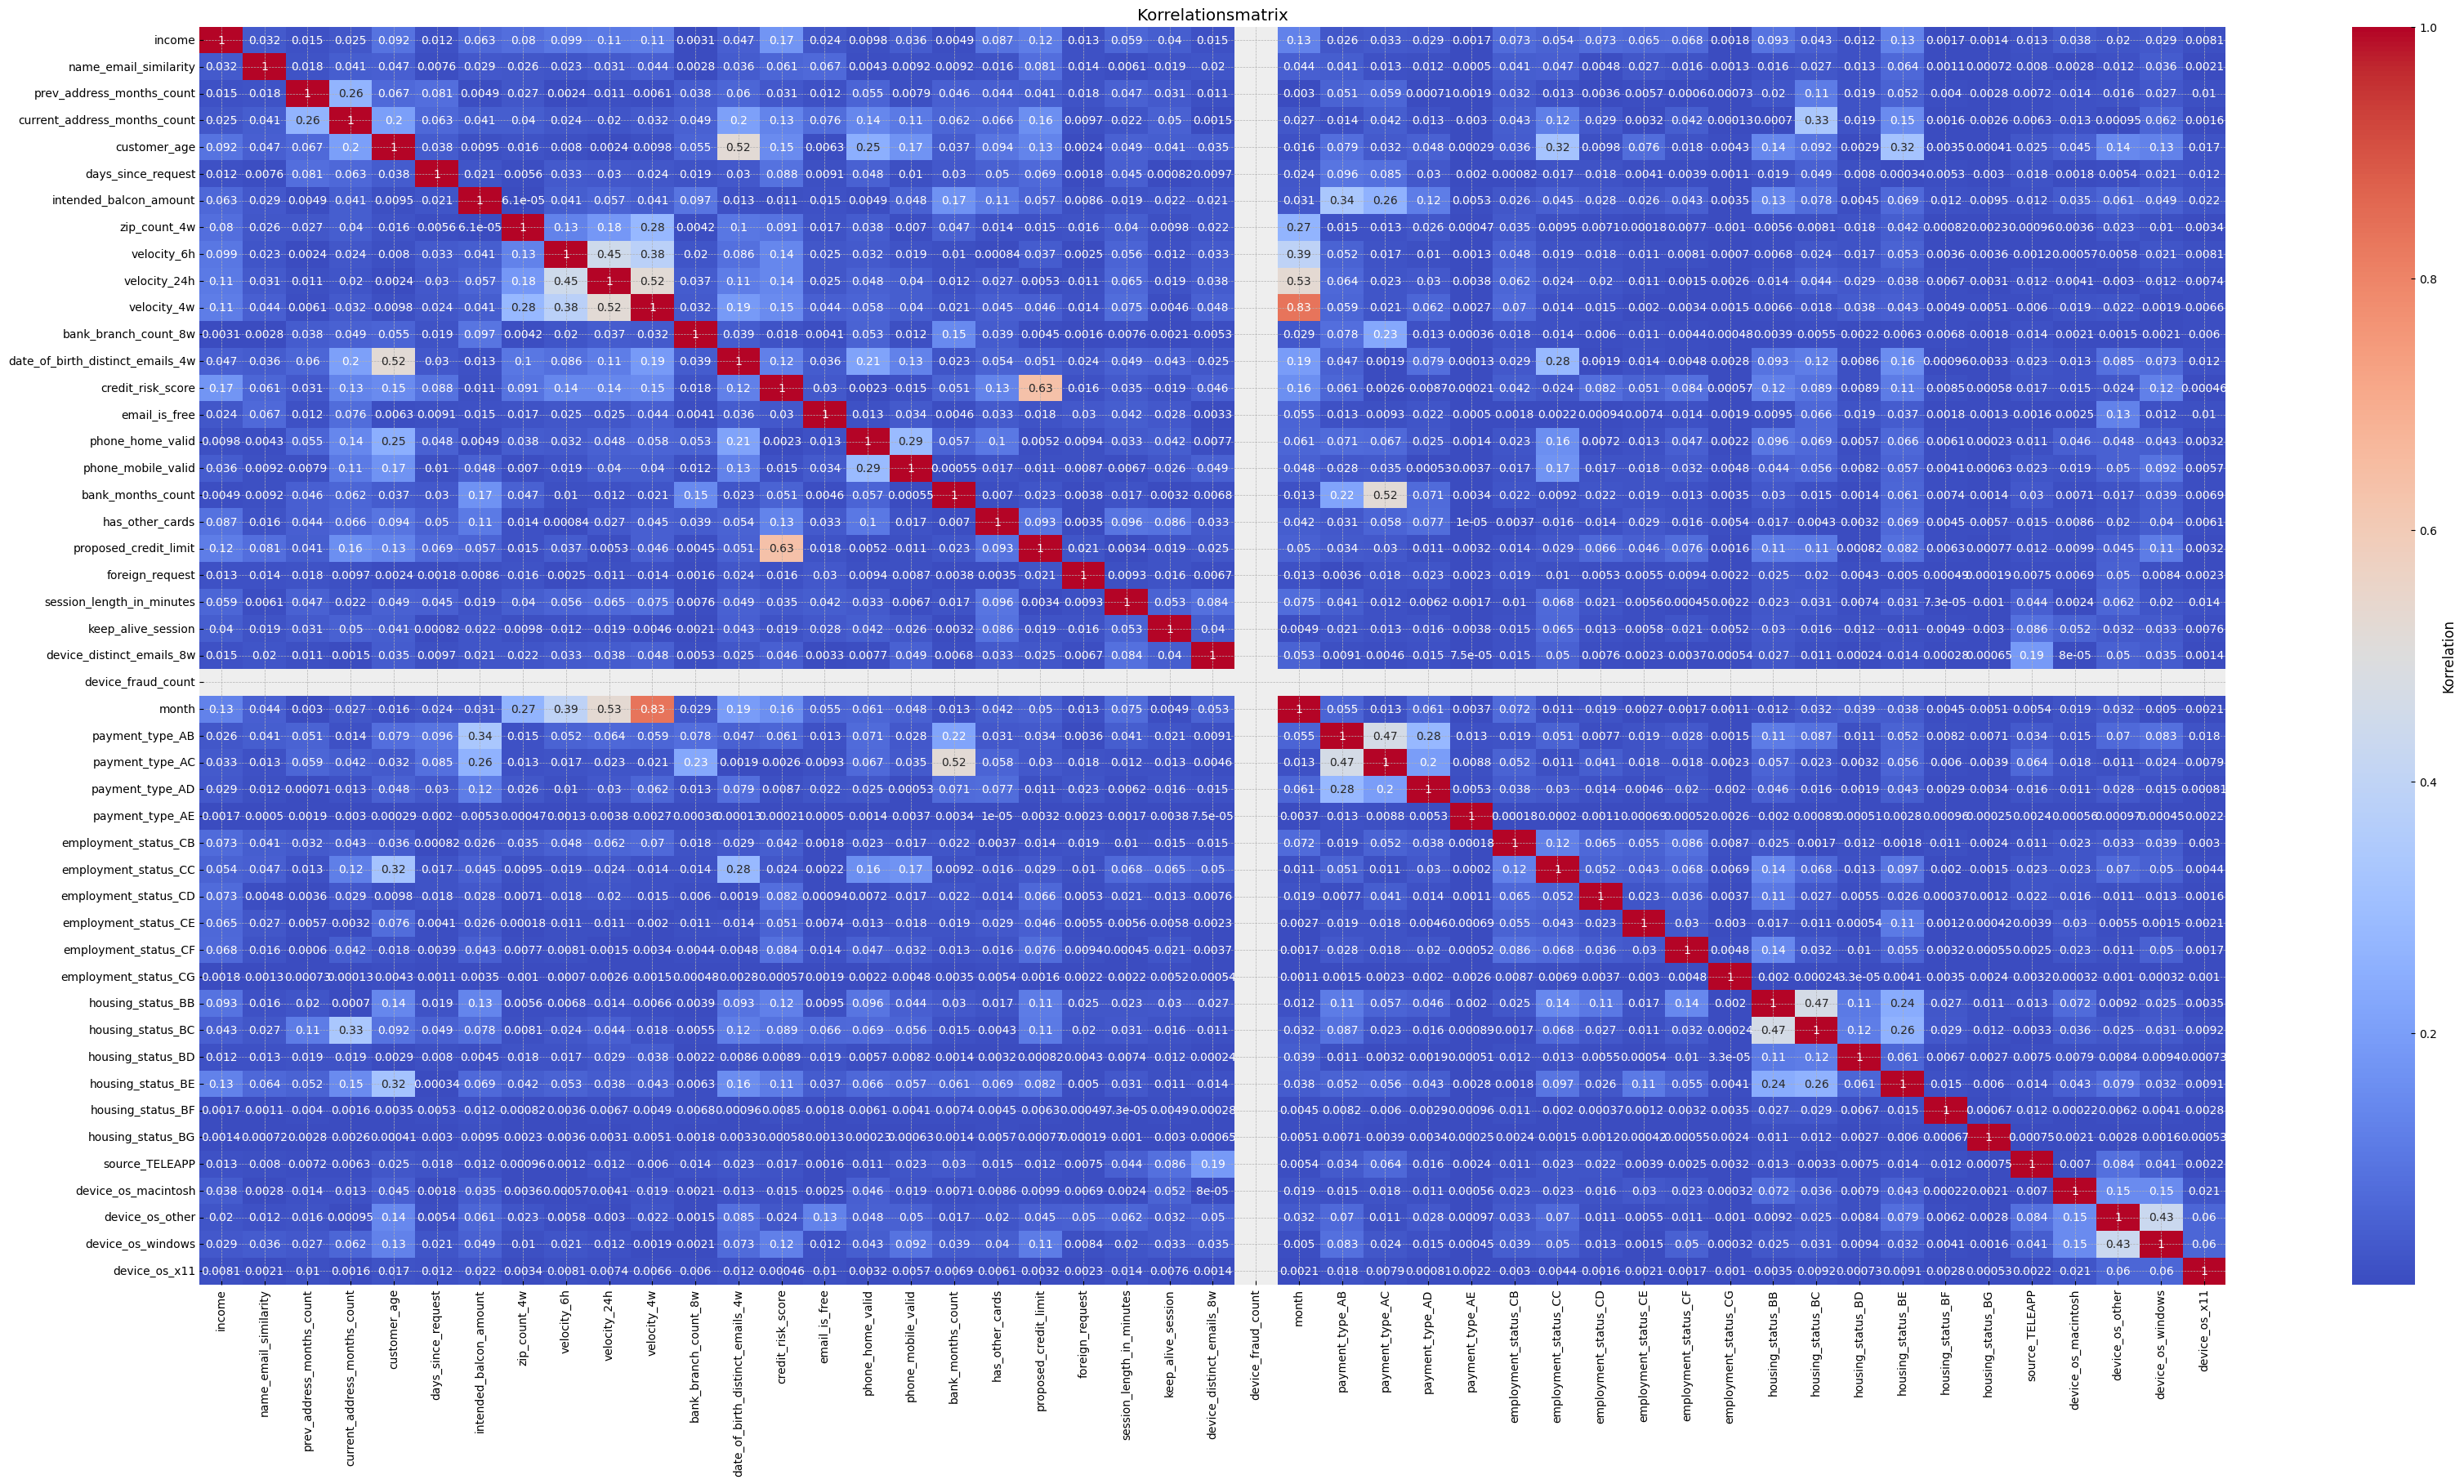

In [164]:
# Korrelation berechnen
corr_matrix = X.corr().abs() # abs() sehr wichtig, da auch Negativkorrelationen möglich sind und diese sonst nicht vom Threshold weiter unten erfasst werden

# Heatmap zur visuellen Kontrolle
plt.figure(figsize=(40, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, cbar_kws={'label': 'Korrelation'}) # annot = True schreibt Werte in die Kästchen, cbar_kws={'label': 'Korrelation'} labeled die Skala rechts
plt.title("Korrelationsmatrix")
plt.show()

In [143]:
# obere Dreiecksmatrix auswählen
obere = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# stark korrelierte Features identifizieren
threshold = 0.8
to_drop = [column for column in obere.columns if any(obere[column] > threshold)]
print("Features mit starker Korrelation über threshold:", to_drop)

Zu stark korrelierte Features: ['month']


In [144]:
# Features mit hoher Korrelation entfernen

X = X.drop(columns=to_drop)
print("Neue Form des DataFrames:", X.shape)

Neue Form des DataFrames: (1000000, 46)


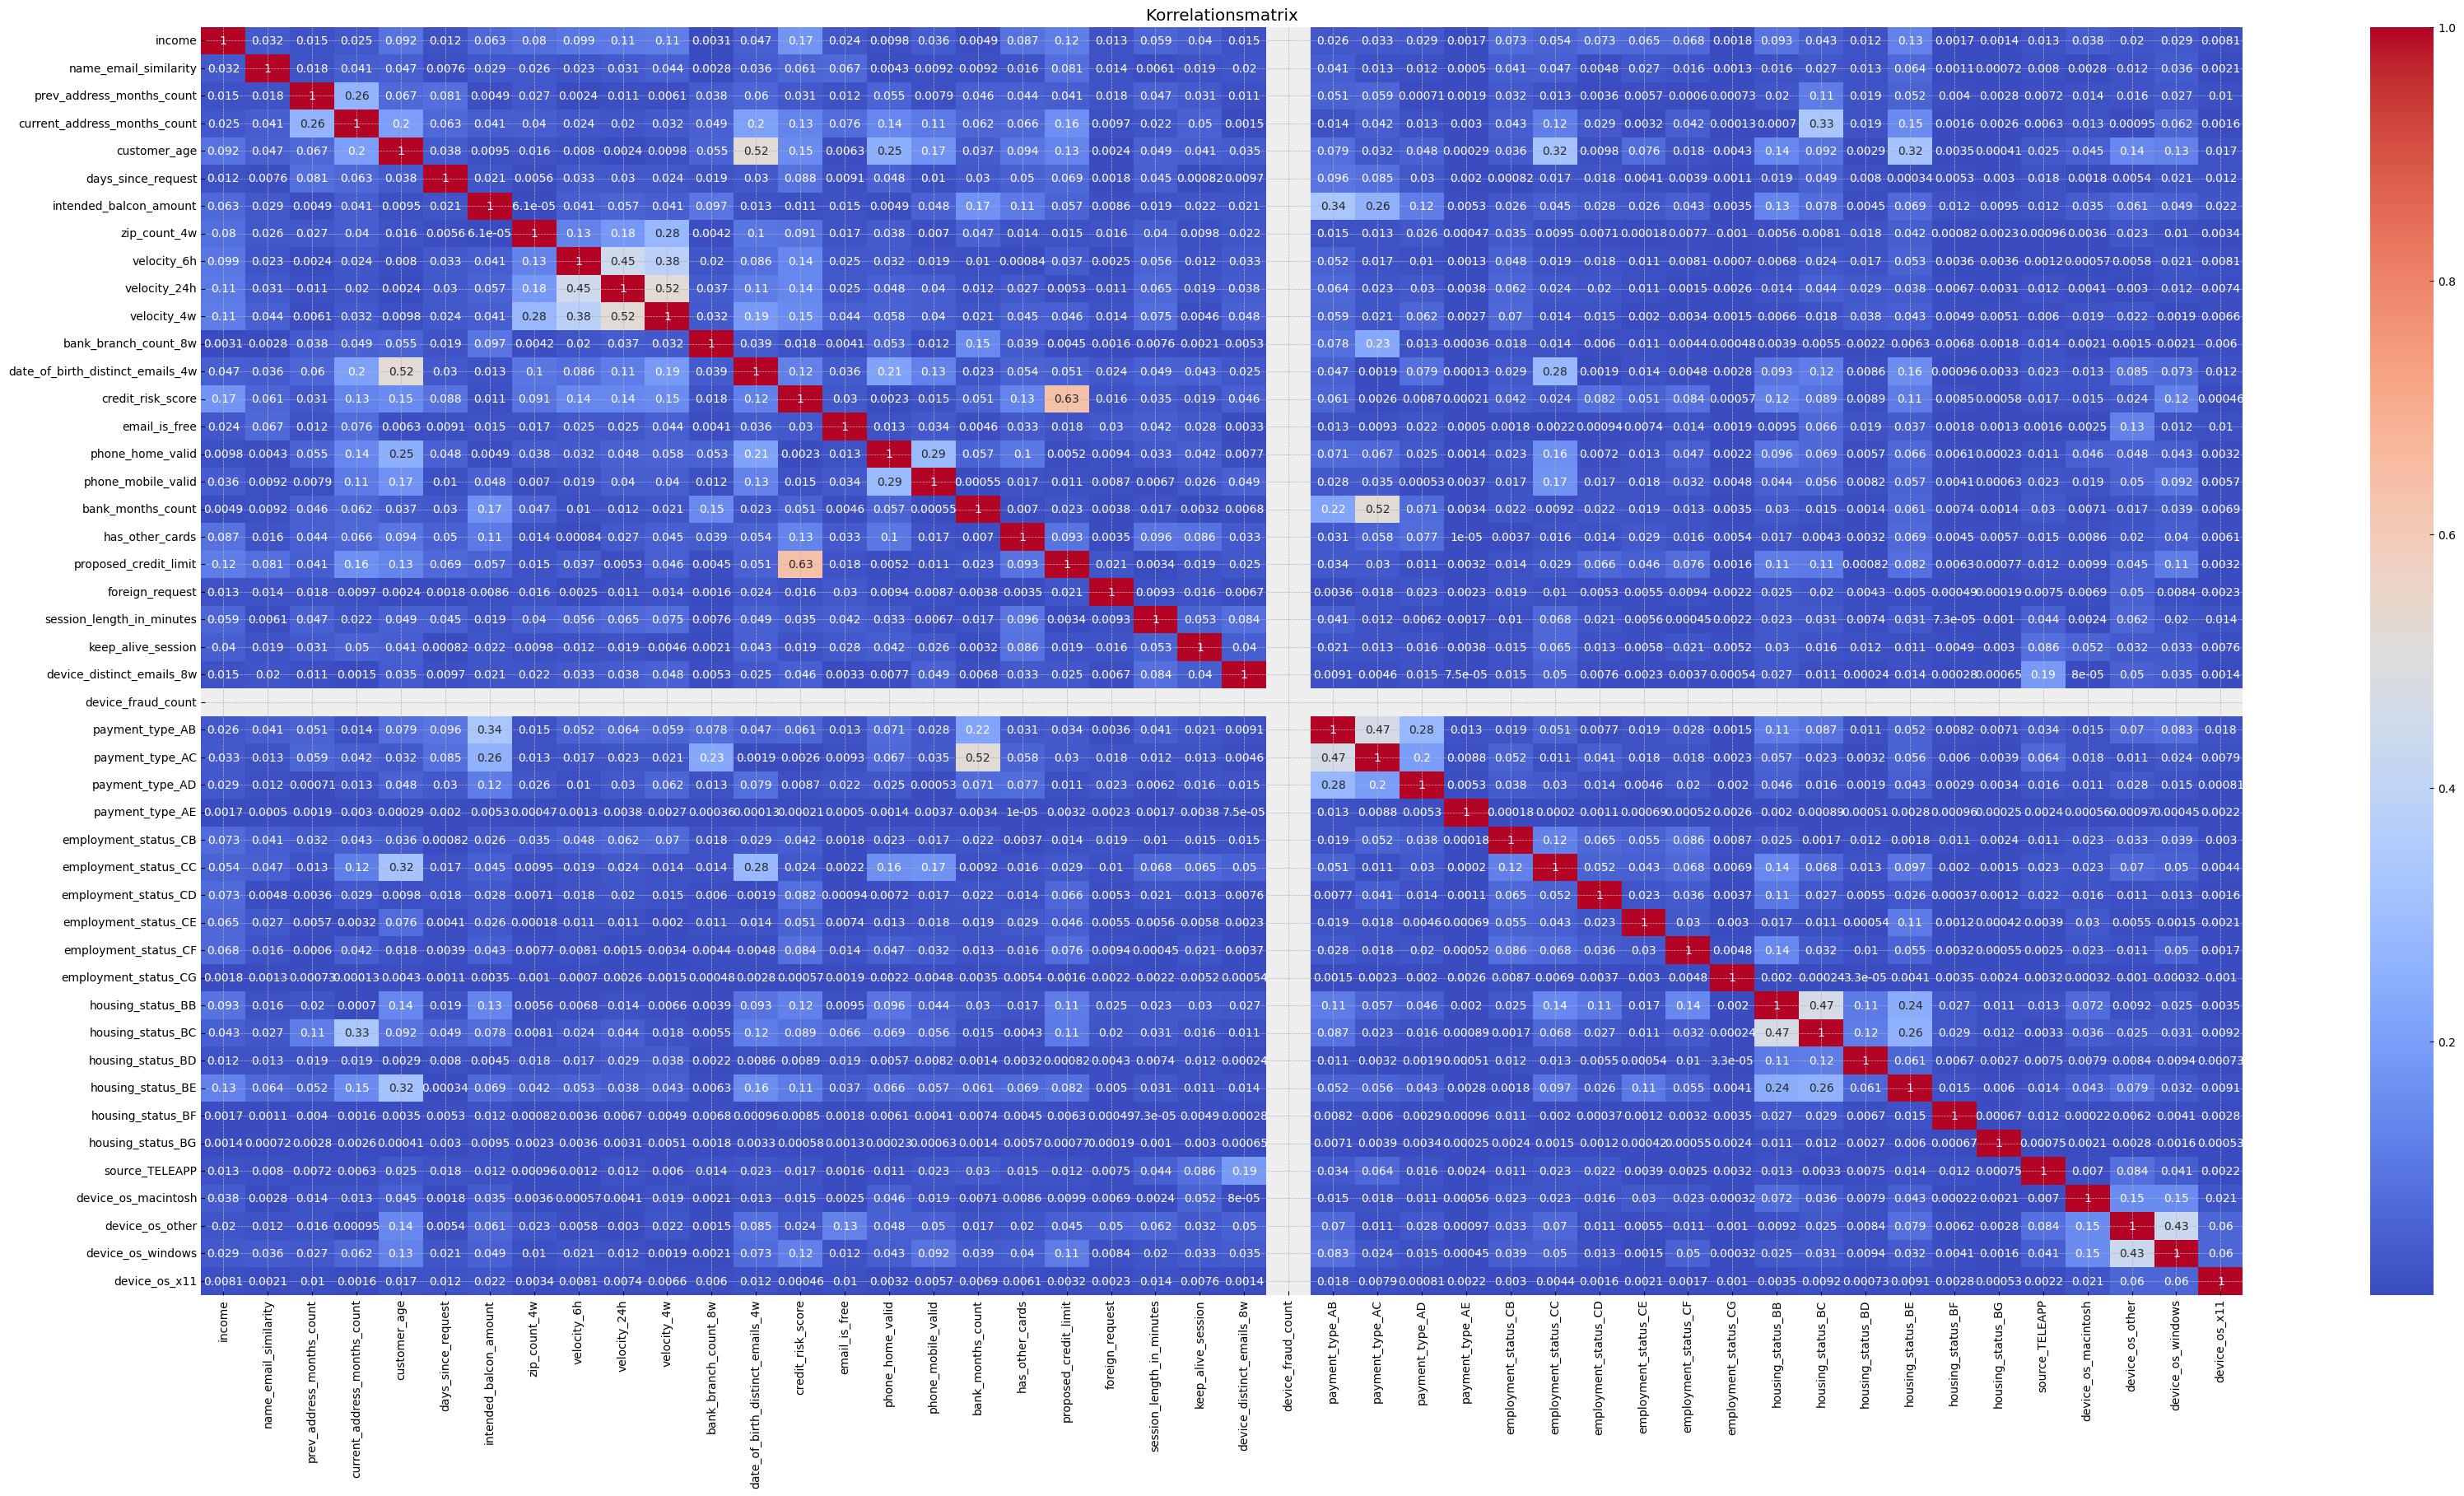

In [145]:
# Neue Korrelsationen nochmal prüfen
corr_matrix_reduced = X.corr().abs() # abs() sehr wichtig, da auch Negativkorrelationen möglich sind und diese sonst nicht vom Threshold weiter unten erfasst werden

# Heatmap zur visuellen Kontrolle
plt.figure(figsize=(40, 20))
sns.heatmap(corr_matrix_reduced, cmap='coolwarm', annot=True, cbar_kws={'label': 'Korrelation'})
plt.title("Korrelationsmatrix")
plt.show()

## Varianz berechnen und Features mit niedriger Varianz (viele gleiche Werte) entfernen, da kein Einfluss auf Modell und mehr Rechenleistung nötig

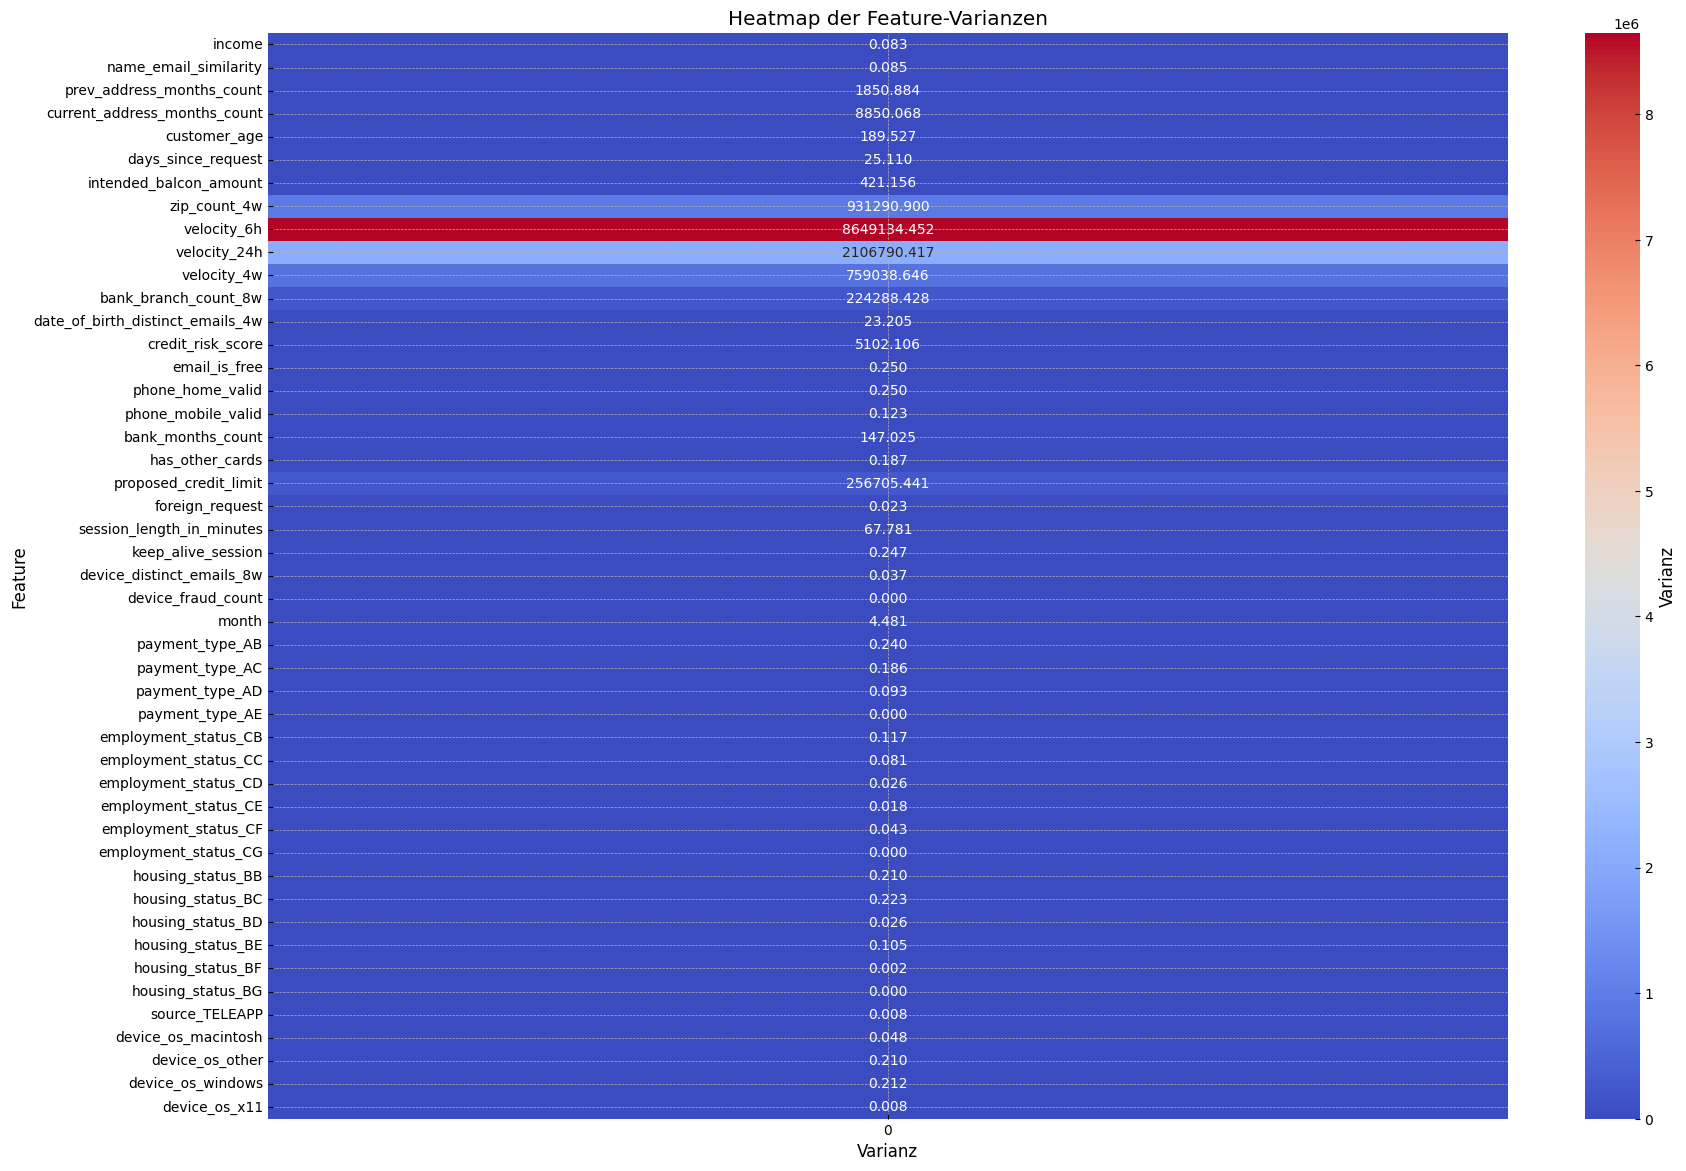

In [166]:
# Varianz aller Feature berechnen
variances = X.var()

# Als Heatmap darstellen
plt.figure(figsize=(20, len(X.columns)*0.3))  # Höhe abhängig von Anzahl Features
sns.heatmap(variances.to_frame(), annot=True, fmt=".3f", cmap="coolwarm", cbar_kws={'label': 'Varianz'}) # annot = True schreibt Werte in die Kästchen, 
# fmt=".3f" zeigt Werte im Heatmap nur bis 3 Dezimalstellen für bessere Lesbarkeit an
# cbar_kws={'label': 'Varianz'} labeled die Skala rechts

plt.title("Heatmap der Feature-Varianzen")
plt.xlabel("Varianz")
plt.ylabel("Feature")
plt.show()

In [167]:
# Automatisierte Varianzerkennung mit VarianceThreshold: Entfernt Features, deren Varianz unter einem Schwellwert liegt
sel = VarianceThreshold(threshold=0.01)  # Nur filter für die Daten, z. B. 0.01 = 1% Varianz, bedeutet es werden alle Spalten entfernt, bei denen eine Klasse 99% vorkommt
sel.fit_transform(X) # berechnet die Varianz jedes Features im data frame, verändert Daten nicht

# gibt behaltene Spalten aus
kept_columns = X.columns[sel.get_support()]

# gibt gelöschte Spalten aus
removed_columns = X.columns[~sel.get_support()]

#speichert die behaltenen Feature über Threshold in DataFrame
#X = X[kept_columns]

#print("Behaltene Spalten (über Threshold):")
#print(list(kept_columns))

print("\n Entfernte Spalten (unter Threshold):")
print(list(removed_columns))


 Entfernte Spalten (unter Threshold):
['device_fraud_count', 'payment_type_AE', 'employment_status_CG', 'housing_status_BF', 'housing_status_BG', 'source_TELEAPP', 'device_os_x11']


In [ ]:
# Aufteilen der Daten in Train und Testdaten
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Skalieren der Daten vor dem Train-Test-Split
#scaler = StandardScaler()

# Lernt das Skalieren der Gesamtdaten --> Parameterermittlung für Skalierung
#scaler.fit(X_train)

# Anwenden der Skalierung auf die Daten --> Transform
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Vorbereitung der Daten mit Pipeline, eine Pipeline kann für sehr viele Modelle genutzt werden und arbeitet die verschiedenen Schritte ab
pipe = Pipeline([
    ("scaler", StandardScaler()), # Skalierung, Standard Scaler entspricht z-Skalierung, macht die Schritte von oben automatisch
    # Bestimmung der Funktion, ob Polynome Features eingeführt werden sollen (eher für kleine Datensätze)
    ('preprocessing', PolynomialFeatures(degree=2, include_bias=False)), 
    
    # Bestimmung des Modells, penalty = "l2" ist standard und steht für Ridge-Regularisierung
    # die Regularisierung führt einen Strafterm ein mit lambda, sodass es zu keinen Übergewichtungen von parametern kommt
    # C (=1/lambda) bestimmt die Gesichtung des Strafterms, default ist hier 1.0
    # max_iter bestimmt wie viele Iterationen zur Optimierung des Modells durchgeführt werden
    ('model', LogisticRegression(penalty='l2', C=1.0, max_iter=100))])
                                                            

# Aufteilen der Daten in Train und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Fit der Daten mit den Traindaten
pipe.fit(X_train, y_train)

In [ ]:
# Test der Vorhersage mit den train-Daten
y_train_predict = pipe.predict(X_train)

# Test der Vorhersage mit den test-Daten
y_test_predict = pipe.predict(X_test)

In [ ]:
# Erstellen der Confusion Matrix für train-Daten
cm = confusion_matrix(y_train, y_train_predict)
plotted_matrix = ConfusionMatrixDisplay(confusion_matrix= cm)
plotted_matrix.plot(cmap='Blues')
accuracy_score(y_train, y_train_predict)

In [ ]:
# Erstellen der Confusion Matrix für test-Daten
cm = confusion_matrix(y_test, y_test_predict)
plotted_matrix = ConfusionMatrixDisplay(confusion_matrix= cm)
plotted_matrix.plot(cmap='Blues')
accuracy_score(y_test, y_test_predict)

In [122]:
# Modellvalidierung mit statsmodel
endog = y # Zielvariable (abhängige Variable)
exog = sm.add_constant(X) # Erklärende Variablen (unabhängige Variable), sm.add_constant fügt Spalte mit nur Einsen hinzu für Intercept (β₀)

# Model Training
logit_mod = sm.Logit(endog, exog) # Erstellt ein logistisches Regressionsmodell
logit_res = logit_mod.fit() # fitten (trainieren) des Modells

# Calculating probas
#logit_probabilities = logit_res.predict(exog)
#logit_predictions = pd.Series(logit_probabilities).apply(lambda x: "Up" if (x > 0.5) else "Down")

# Results
logit_res.summary()

         Current function value: 0.048676
         Iterations: 35


LinAlgError: Singular matrix